## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from math import isinf
from sklearn import ensemble 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Functions

###### Shamelessly copied

In [ ]:
# One-Hot Encoding
def onehot_encode(df, columns):
    return pd.get_dummies(df, columns=columns, prefix=columns)

# Label Encoding
def label_encode(df, columns):
    le = LabelEncoder()
    data = df.copy()
    for col in columns:
        data[col] = le.fit_transform(df[col])
    return data

## Data exploration

In [ ]:
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11 سال ساخت,1,2.0,"2,200,000,000 تومان"
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7 سال ساخت,1,2.0,"4,800,000,000 تومان"
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,تازه ساز,2,2.0,"10,200,000,000 تومان"
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6 سال ساخت,4,1.0,"870,000,000 تومان"
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,تازه ساز,همکف,3.0,"5,350,000,000 تومان"
...,...,...,...,...,...,...,...,...,...,...
48116,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4 سال ساخت,3,2.0,"4,100,000,000 تومان"
48117,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15 سال ساخت,1,2.0,"5,500,000,000 تومان"
48118,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4 سال ساخت,2,3.0,"4,100,000,000 تومان"
48119,فروش آپارتمان,85.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متری دوخواب\r\n متری \nشمالی\nد...,36.327670,59.548380,13 سال ساخت,3,2.0,"3,200,000,000 تومان"


In [ ]:
data.describe()

,area,latitude,longitude,bedrooms
count,48121.000000,48120.000000,48120.000000,48119.000000
mean,166.271241,36.330968,59.529667,2.280929
std,2096.815156,0.034520,0.054514,0.966589
min,0.000000,34.929853,58.863373,0.000000
25%,85.000000,36.310605,59.475820,2.000000
50%,112.000000,36.327540,59.517400,2.000000
75%,156.000000,36.363948,59.571770,3.000000
max,300000.000000,36.528536,60.525852,12.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48121 entries, 0 to 48120
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          48121 non-null  object 
 1   area          48121 non-null  float64
 2   neighborhood  48120 non-null  object 
 3   description   45838 non-null  object 
 4   latitude      48120 non-null  float64
 5   longitude     48120 non-null  float64
 6   age           47649 non-null  object 
 7   floor         48121 non-null  object 
 8   bedrooms      48119 non-null  float64
 9   price         48121 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.7+ MB


In [ ]:
data.isna().sum()

type               0
area               0
neighborhood       1
description     2283
latitude           1
longitude          1
age              472
floor              0
bedrooms           2
price              0
dtype: int64

## Pre-Processing

### Floor

In [ ]:
data['floor'].unique()

array(['1', '2', '4', 'همکف', '5', '3', '9', '6', '8', '7', '-1', '10',
       '15', '20', '11', '18', '17', '-130', '14', '30', '21', '13', '12',
       '16', '22'], dtype=object)

In [ ]:
data['floor'].replace('همکف', 0, inplace=True)

In [ ]:
data['floor'] = data['floor'].astype(int)

In [ ]:
data.loc[data['floor'] < -1]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
5862,فروش آپارتمان,1920.0,منطقه 7 محله 17 شهریور خیابان هفده شهریور,هتل آپارتمان صفر نزدیک حرم\r\nبه نام خدا\n\n⚜...,36.276045,59.617282,تازه ساز,-130,5.0,"50,000,000,000 تومان"
9938,فروش آپارتمان,340.0,منطقه 1 محله بعثت خیابان کوهسنگی,آپارتمان متر برج باران\r\nبرند باران \n\n...,36.287180,59.574720,1 سال ساخت,-130,4.0,0 تومان
14547,فروش آپارتمان,330.0,منطقه 9 محله هنرستان خیابان هنرستان,برج پنت هاوس متر\r\n✅محمد بیداری - مسکن بی...,36.313811,59.500077,تازه ساز,-130,4.0,"48,000,000,000 تومان"
19332,فروش آپارتمان,85.0,منطقه 12 محله الهیه خیابان الهیه,متر . فول واحدی رحمانیه سند آماده تک برگ\r...,36.376953,59.459780,2 سال ساخت,-130,2.0,"2,690,000,000 تومان"
19868,فروش آپارتمان,250.0,منطقه 1 محله بعثت خیابان کوهسنگی,آپارتمان متر برج الیزه\r\nبرج سفارشی با ...,36.287180,59.574720,1 سال ساخت,-130,3.0,0 تومان
22666,فروش آپارتمان,3627.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,متر هتل فروشی\r\n متر زمین در دو ساخت...,36.272780,59.602730,7 سال ساخت,-130,5.0,"320,000,000,000 تومان"
23124,فروش آپارتمان,142.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,پیش فروش آپارتمان خوابه گل اندیشه و شریعتی\r...,36.272780,59.602730,تازه ساز,-130,3.0,"1,111,111,111 تومان"
27906,فروش آپارتمان,200.0,منطقه 1 محله سجاد خیابان فلسطین,متراستانه‌شرقی غربی اتاق\r\nمعاوضه‌‌یافرو...,36.308098,59.562786,16 سال ساخت,-130,2.0,"14,000,000,000 تومان"
30583,فروش آپارتمان,180.0,منطقه 9 محله هنرستان خیابان هاشمیه,آپارتمان متر برج باران\r\nمتفاوت و خاص \n...,36.310605,59.504477,1 سال ساخت,-130,3.0,0 تومان
37678,فروش آپارتمان,140.0,منطقه 12 محله الهیه خیابان الهیه,متر دو واحدی برنددرجه یک منطقه\r\nبا سلام\...,36.373776,59.475820,تازه ساز,-130,3.0,"5,100,000,000 تومان"


Floor of -130 is probably the default NaN value

In [ ]:
data['floor'].replace(-130, float('nan'), inplace=True)

In [ ]:
data['floor'].isna().sum()

11

### Bedrooms

In [ ]:
data.loc[data['bedrooms'] < 1]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
55,فروش آپارتمان,0.0,منطقه 2 محله کوی امیرالمومنین خیابان کوی امیر...,سه خواب/صفر/فول\r\nبا سلام \nآپارتمان واقع در...,36.341250,59.571770,تازه ساز,0.0,0.0,0 تومان
59,فروش آپارتمان,0.0,منطقه 12 محله الهیه خیابان الهیه,متری-روژان-سه نبش\r\nبا سلام\nواحد در حال ...,36.378821,59.462804,تازه ساز,0.0,0.0,0 تومان
73,فروش آپارتمان,125.0,منطقه 11 محله آزاد شهر خیابان آزادشهر,مترى سروش جلال بین مهران و اموزگار\r\nدرو...,36.327540,59.527520,تازه ساز,0.0,0.0,0 تومان
83,فروش آپارتمان,160.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,متری*انتهای فرامرز\r\n متری سه خواب\nم...,36.346940,59.557926,تازه ساز,0.0,0.0,0 تومان
120,فروش آپارتمان,0.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,سید رضی تک واحدی\r\n.\n ...,36.328550,59.513390,تازه ساز,0.0,0.0,0 تومان
...,...,...,...,...,...,...,...,...,...,...
48073,فروش آپارتمان,500.0,منطقه 9 محله رضاشهر خیابان رضاشهر,مشارکت درساخت مترشمالی رضاشهر\r\nقابل توجه...,36.288372,59.540913,تازه ساز,0.0,0.0,0 تومان
48074,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,متر تک واحدی مدرن بدون مشابه\r\nالهیه - \n...,36.373776,59.475820,تازه ساز,0.0,0.0,0 تومان
48086,فروش آپارتمان,100.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متر پیش فروش ادیب \r\n** بنام خدای مهربا...,36.360020,59.517400,تازه ساز,0.0,0.0,0 تومان
48091,فروش آپارتمان,125.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان پیش‌فروش متری رحمانیه \r\nباسلام ...,36.373776,59.475820,تازه ساز,0.0,0.0,0 تومان


Most of the 0 bedrooms also have 0 bedrooms and price.  
this means some 0 floors mean NaN, and not ground floor.  

There is no way of knowing, except to drop the ones that lack a price

In [ ]:
# Replacing 0 with NaN so the model wont be misinformed
data['bedrooms'].replace(0, float('nan'), inplace=True)

### Price

In [ ]:
data['price'] = data['price'].str.replace(' تومان','')

In [ ]:
data['price'] = data['price'].str.replace(',', '')

In [ ]:
data['price'] = data['price'].str.replace('توافقی', '0')

In [ ]:
data['price'] = data['price'].astype('int64') # int and int32 are too short

Prices with 0 value should be dropped. This will also drop many 0 valued floors and bedrooms, making the other true zeros(ground floors) more accurate

In [ ]:
data['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48121 entries, 0 to 48120
Series name: price
Non-Null Count  Dtype
--------------  -----
48121 non-null  int64
dtypes: int64(1)
memory usage: 376.1 KB


In [ ]:
data = data.drop(data[data['price'] == 0].index)

In [ ]:
data = data.drop(data[data['price'] == 1111111].index)
data = data.drop(data[data['price'] == 11111111].index)

### Price => sqmprice

In [ ]:
data['sqmprice'] = data['price'] // data['area']

In [ ]:
data['sqmprice'].describe

<bound method NDFrame.describe of 0        30136986.0
1        48000000.0
2        72857142.0
3        13384615.0
4        26750000.0
            ...    
48115    46363636.0
48116    37272727.0
48117    39285714.0
48118    31538461.0
48119    37647058.0
Name: sqmprice, Length: 46065, dtype: float64>

### Age

In [ ]:
data['age'].unique()

array(['11 سال ساخت', '7 سال ساخت', 'تازه ساز', '6 سال ساخت',
       '10 سال ساخت', '15 سال ساخت', '4 سال ساخت', '23 سال ساخت',
       '9 سال ساخت', '2 سال ساخت', '30 سال ساخت', '17 سال ساخت',
       '27 سال ساخت', '20 سال ساخت', '24 سال ساخت', '14 سال ساخت',
       '12 سال ساخت', '1 سال ساخت', '8 سال ساخت', nan, '16 سال ساخت',
       '5 سال ساخت', '13 سال ساخت', '21 سال ساخت', '25 سال ساخت',
       '3 سال ساخت', '19 سال ساخت', '22 سال ساخت', '28 سال ساخت',
       '18 سال ساخت', '1402 سال ساخت', '31 سال ساخت', '26 سال ساخت',
       '29 سال ساخت', '98 سال ساخت', '40 سال ساخت', '1387 سال ساخت',
       '1401 سال ساخت', '38 سال ساخت', '41 سال ساخت'], dtype=object)

In [ ]:
data['age'] = data['age'].str.replace('تازه ساز', '0')

In [ ]:
data['age'] = data['age'].str.replace(' سال ساخت', '')

In [ ]:
data['age'].unique()

array(['11', '7', '0', '6', '10', '15', '4', '23', '9', '2', '30', '17',
       '27', '20', '24', '14', '12', '1', '8', nan, '16', '5', '13', '21',
       '25', '3', '19', '22', '28', '18', '1402', '31', '26', '29', '98',
       '40', '1387', '1401', '38', '41'], dtype=object)

In [ ]:
# Best way to ignore NaN values is to convert to Float
data['age'] = data['age'].astype(float)

0 is the default value for NaN, so we change them so

In [ ]:
data['age'].replace(0, float('nan'), inplace=True)
data['age'].isna().sum()

13562

We unfortunately can't delete, nor fill them. so we have to leave them as is.

In [ ]:
data.loc[data['age'] > 80]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,sqmprice
227,فروش آپارتمان,155.0,منطقه 2 محله کوی امیرالمومنین خیابان ولیعصر,میلان متری حاشیه ملک متر,36.204212,59.662045,1402.0,-1.0,3.0,3720000000,24000000.0
3641,فروش آپارتمان,115.0,منطقه 12 محله الهیه خیابان الهیه,NaN,36.373776,59.475820,98.0,3.0,2.0,3450000000,30000000.0
11144,فروش آپارتمان,190.0,منطقه 10 محله قاسم آباد خیابان امامیه,زیر بنا متر\r\n\r\n نبش جنوبی \r\n\r\nقوی ...,36.362476,59.515076,1402.0,2.0,3.0,6800000000,35789473.0
20015,فروش آپارتمان,165.0,منطقه 2 محله کوی امیرالمومنین خیابان ولیعصر,NaN,36.204212,59.662045,1402.0,6.0,3.0,3950000000,23939393.0
21791,فروش آپارتمان,92.0,منطقه 9 محله آب و برق خیابان لادن,بهترین موقعیت مکانی,36.329591,59.474027,1387.0,1.0,2.0,3500000000,38043478.0
28506,فروش آپارتمان,110.0,منطقه 9 محله رضاشهر خیابان سرافرازان,فروش فوری \r\nصفر متر \r\nانتقال سند الی...,36.290086,59.502946,1401.0,4.0,2.0,3750000000,34090909.0


In [ ]:
# Hand correcting that single one (and also to make automated correction easier)
data['age'] = data['age'].replace(98.0, 4.0)

In [ ]:
# Correcting the 13xx/14xx dates with their age rather than year built
data.loc[data['age'] > 1300, 'age'] = 1402 - data['age']

In [ ]:
data.describe()

,area,latitude,longitude,age,floor,bedrooms,price,sqmprice
count,46065.000000,46064.000000,46064.000000,32503.000000,46058.000000,45763.000000,4.606500e+04,46065.0
mean,168.283912,36.330782,59.529927,10.011814,2.396392,2.394926,6.786497e+09,inf
std,2142.794623,0.034497,0.054646,7.414401,1.778091,0.838044,2.711606e+10,NaN
min,0.000000,34.929853,58.863373,0.000000,-1.000000,1.000000,6.000000e+06,17550.0
25%,86.000000,36.310243,59.475820,4.000000,1.000000,2.000000,2.650000e+09,28571428.0
50%,112.000000,36.327540,59.517400,9.000000,2.000000,2.000000,3.900000e+09,35000000.0
75%,156.000000,36.362376,59.571770,15.000000,4.000000,3.000000,6.600000e+09,46000000.0
max,300000.000000,36.528536,60.525852,41.000000,30.000000,12.000000,4.300000e+12,inf


### Area

In [ ]:
# Removing some outliers
data.loc[data['area'] > 10000]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,sqmprice
4232,فروش آپارتمان,110000.0,منطقه 8 محله چهارراه لشکر خیابان بلوار امام خ...,آپارتمان متری عدل خمینی\r\nخونه بسیار تمیز...,36.288100,59.600600,11.0,2.0,2.0,40000000000,363636.0
5796,فروش آپارتمان,40000.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,فروش هتل ستاره بنام مشهد/سندملکی/کارشناسی\r\n...,36.272780,59.602730,11.0,6.0,5.0,900000000000,22500000.0
7208,فروش ویلایی,111111.0,منطقه 2 محله هدایت خیابان ابوطالب,مغازه و انباری\r\nجهت تماس با شماره داخل تصوی...,36.318450,59.587680,NaN,0.0,NaN,1950000000,17550.0
15554,فروش آپارتمان,300000.0,منطقه 3 محله گاز خیابان گاز,آپارتمان طبقه\r\nآپارتمان طبقه .طبقه اول را...,36.315080,59.632800,9.0,0.0,1.0,70000000000,233333.0
19754,فروش آپارتمان,65000.0,منطقه 4 و 5 محله طلاب خیابان مفتح,اپارتمان متری طبقه اول\r\nاپارتمان متری ...,36.296030,59.643700,NaN,1.0,1.0,120000000000,1846153.0
20449,فروش آپارتمان,17000.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,هتل ستاره صفر کلید نخورده دقیقه تا حرم اما...,36.272780,59.602730,NaN,16.0,5.0,500000000000,29411764.0
20716,فروش آپارتمان,125000.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری در محمدیه\r\nتوضیحات زنگ بزن...,36.373776,59.475820,1.0,6.0,2.0,45000000000,360000.0
22079,فروش ویلایی,75000.0,منطقه 7 محله سیدی خیابان کوشش,خانه ویلایی\r\n متری دردوطبقه مجزامناسب دوخ...,36.265280,59.609260,NaN,0.0,3.0,204000000000,2720000.0
28675,فروش ویلایی,111111.0,منطقه 1 محله بعثت خیابان رضا,*ویلایی با تجاری / حاشیه پیروزی / رضاشهر\r\n﷽...,36.291085,59.565186,14.0,0.0,5.0,39000000000,351000.0
34554,فروش آپارتمان,90000.0,منطقه 3 محله گاز خیابان طبرسی شمالی,فروش هوای طبقه سوم خانه اپارتمانی\r\nخانه فوق...,36.323210,59.627390,NaN,3.0,NaN,27000000000,300000.0


In [ ]:
data = data.drop(data[data['area'] > 10000].index)

### Neighborhood => Zone

In [ ]:
data['zone'] = data['neighborhood'].str.slice(stop=8)

In [ ]:
data['zone'].unique()

array(['منطقه 12', 'منطقه 2 ', 'منطقه 9 ', 'منطقه 1 ', 'منطقه 10',
       'منطقه 11', 'منطقه 7 ', 'منطقه 8 ', 'منطقه 6 ', 'منطقه 3 ',
       'منطقه 4 ', nan], dtype=object)

In [ ]:
data['zone'] = data['zone'].str.replace('منطقه', '')

In [ ]:
data['zone'] = data['zone'].astype(float)

In [ ]:
data['zone'].describe()

count    46050.000000
mean         7.941194
std          3.983066
min          1.000000
25%          4.000000
50%          9.000000
75%         11.000000
max         12.000000
Name: zone, dtype: float64

### Neighborhood => Neighborhood & Street

In [ ]:
data['neighborhood']

0                     منطقه 12 محله الهیه  خیابان الهیه
1        منطقه 2 محله فرامرز عباسی  خیابان فرامرز عباسی
2                   منطقه 9 محله هنرستان  خیابان هاشمیه
3                     منطقه 12 محله الهیه  خیابان الهیه
4                     منطقه 12 محله الهیه  خیابان الهیه
                              ...                      
48115              منطقه 11 محله آزاد شهر  خیابان فرهنگ
48116                 منطقه 12 محله الهیه  خیابان الهیه
48117              منطقه 9 محله هنرستان  خیابان هفت تیر
48118         منطقه 10 محله قاسم آباد  خیابان قاسم آباد
48119    منطقه 2 محله فرامرز عباسی  خیابان فرامرز عباسی
Name: neighborhood, Length: 46051, dtype: object

Dropping the null values as the interfere with a lambda function later on

In [ ]:
data = data.drop(data[data['neighborhood'].isna()].index)

This method only works with unified strings(all being the same format)

In [ ]:
data['neighborhood'] = data['neighborhood'].str[13:len(data['neighborhood'])-13]

In [ ]:
data['neighborhood']

0                      الهیه  خیابان الهیه
1        فرامرز عباسی  خیابان فرامرز عباسی
2                   هنرستان  خیابان هاشمیه
3                      الهیه  خیابان الهیه
4                      الهیه  خیابان الهیه
                       ...                
48115               آزاد شهر  خیابان فرهنگ
48116                  الهیه  خیابان الهیه
48117              هنرستان  خیابان هفت تیر
48118          قاسم آباد  خیابان قاسم آباد
48119    فرامرز عباسی  خیابان فرامرز عباسی
Name: neighborhood, Length: 46050, dtype: object

In [ ]:
data['neighborhood'] = data['neighborhood'].str.split(' خیابان ')

In [ ]:
data['neighborhood']

0                     [ الهیه , الهیه]
1        [فرامرز عباسی , فرامرز عباسی]
2                   [هنرستان , هاشمیه]
3                     [ الهیه , الهیه]
4                     [ الهیه , الهیه]
                     ...              
48115              [ آزاد شهر , فرهنگ]
48116                 [ الهیه , الهیه]
48117              [هنرستان , هفت تیر]
48118         [ قاسم آباد , قاسم آباد]
48119    [فرامرز عباسی , فرامرز عباسی]
Name: neighborhood, Length: 46050, dtype: object

Separating the street from neighborhood

In [ ]:
data['street'] = data['neighborhood'].apply(lambda x:x.pop(1))

In [ ]:
data.head()

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,sqmprice,zone,street
0,فروش آپارتمان,73.0,[ الهیه ],متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1.0,2.0,2200000000,30136986.0,12.0,الهیه
1,فروش آپارتمان,100.0,[فرامرز عباسی ],آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1.0,2.0,4800000000,48000000.0,2.0,فرامرز عباسی
2,فروش آپارتمان,140.0,[هنرستان ],متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,NaN,2.0,2.0,10200000000,72857142.0,9.0,هاشمیه
3,فروش آپارتمان,65.0,[ الهیه ],آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4.0,1.0,870000000,13384615.0,12.0,الهیه
4,فروش آپارتمان,200.0,[ الهیه ],/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,NaN,0.0,3.0,5350000000,26750000.0,12.0,الهیه


Converting neighborhood to string

In [ ]:
data['neighborhood'] = data['neighborhood'].apply(lambda x:x.pop())

In [ ]:
data['neighborhood'].head()

0           الهیه 
1    فرامرز عباسی 
2         هنرستان 
3           الهیه 
4           الهیه 
Name: neighborhood, dtype: object

In [ ]:
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,sqmprice,zone,street
0,فروش آپارتمان,73.0,الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1.0,2.0,2200000000,30136986.0,12.0,الهیه
1,فروش آپارتمان,100.0,فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1.0,2.0,4800000000,48000000.0,2.0,فرامرز عباسی
2,فروش آپارتمان,140.0,هنرستان,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,NaN,2.0,2.0,10200000000,72857142.0,9.0,هاشمیه
3,فروش آپارتمان,65.0,الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4.0,1.0,870000000,13384615.0,12.0,الهیه
4,فروش آپارتمان,200.0,الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,NaN,0.0,3.0,5350000000,26750000.0,12.0,الهیه
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,فروش آپارتمان,110.0,آزاد شهر,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4.0,2.0,5100000000,46363636.0,11.0,فرهنگ
48116,فروش آپارتمان,110.0,الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3.0,2.0,4100000000,37272727.0,12.0,الهیه
48117,فروش آپارتمان,140.0,هنرستان,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1.0,2.0,5500000000,39285714.0,9.0,هفت تیر
48118,فروش آپارتمان,130.0,قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2.0,3.0,4100000000,31538461.0,10.0,قاسم آباد


### Description 

We can extract some useful information from this part, like amenities and facilities.  

Adding a new columns with boolean value

In [ ]:
data['elevator'] = data['description'].str.contains('آسانسور دارد')

In [ ]:
data['parking'] = data['description'].str.contains('پارکینگ دارد')

In [ ]:
data['storage'] = data['description'].str.contains('انباری دارد')

In [ ]:
data['yard'] = data['description'].str.contains('حیاط')

In [ ]:
data['balcony'] = data['description'].str.contains('بالکن|بالکنی')

In [ ]:
data['reconstructed'] = data['description'].str.contains('بازسازی')

As we are done with the descriptions, we can drop them for data's clarity

In [ ]:
data = data.drop('description', axis=1)

One final overview of the data before encoding

In [ ]:
data

,type,area,neighborhood,latitude,longitude,age,floor,bedrooms,price,sqmprice,zone,street,elevator,parking,storage,yard,balcony,reconstructed
0,فروش آپارتمان,73.0,الهیه,36.373776,59.475820,11.0,1.0,2.0,2200000000,30136986.0,12.0,الهیه,True,True,True,False,False,False
1,فروش آپارتمان,100.0,فرامرز عباسی,36.327670,59.548380,7.0,1.0,2.0,4800000000,48000000.0,2.0,فرامرز عباسی,True,True,True,True,False,False
2,فروش آپارتمان,140.0,هنرستان,36.310605,59.504477,NaN,2.0,2.0,10200000000,72857142.0,9.0,هاشمیه,True,True,True,False,False,False
3,فروش آپارتمان,65.0,الهیه,36.400540,59.388382,6.0,4.0,1.0,870000000,13384615.0,12.0,الهیه,False,False,False,False,False,False
4,فروش آپارتمان,200.0,الهیه,36.373776,59.475820,NaN,0.0,3.0,5350000000,26750000.0,12.0,الهیه,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,فروش آپارتمان,110.0,آزاد شهر,36.328550,59.513390,4.0,4.0,2.0,5100000000,46363636.0,11.0,فرهنگ,True,True,True,False,False,False
48116,فروش آپارتمان,110.0,الهیه,36.371452,59.484620,4.0,3.0,2.0,4100000000,37272727.0,12.0,الهیه,True,True,True,False,False,False
48117,فروش آپارتمان,140.0,هنرستان,36.319780,59.494770,15.0,1.0,2.0,5500000000,39285714.0,9.0,هفت تیر,False,True,True,False,False,True
48118,فروش آپارتمان,130.0,قاسم آباد,36.349873,59.488426,4.0,2.0,3.0,4100000000,31538461.0,10.0,قاسم آباد,True,True,True,False,False,True


## Preprocessing (Again to eliminate nulls)


### NaNs

In [ ]:
data.isna().sum()

type                 0
area                 0
neighborhood         0
latitude             0
longitude            0
age              13555
floor                7
bedrooms           299
price                0
sqmprice             0
zone                 0
street               0
elevator          2283
parking           2283
storage           2283
yard              2283
balcony           2283
reconstructed     2283
dtype: int64

#### Age


In [ ]:
data['age'] = data['age'].replace(float('nan'), 0)


In [ ]:
data['age'].isna().sum()

0

#### floor

In [ ]:
data ['floor'] = data['floor'].replace(float('nan'), 1)

In [ ]:
data['floor'].isna().sum()

0

#### Bedrooms


In [ ]:
data['bedrooms'] = data['bedrooms'].replace(float('nan'), (data['bedrooms'].mean().astype('int')))

In [ ]:
data['bedrooms'].isna().sum()

0

#### Other 6 features


In [ ]:
cols = ['elevator', 'parking', 'storage', 'yard', 'balcony', 'reconstructed']
data[cols] = data[cols].replace(float('nan'), False)

## Encoding

In [ ]:
columns = ['type', 'neighborhood', 'street', 'elevator', 'parking', 
           'storage', 'yard', 'balcony', 'reconstructed']

label encoding

In [ ]:
label_encoded = label_encode(data, columns)

In [ ]:
label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46050 entries, 0 to 48119
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           46050 non-null  int32  
 1   area           46050 non-null  float64
 2   neighborhood   46050 non-null  int32  
 3   latitude       46050 non-null  float64
 4   longitude      46050 non-null  float64
 5   age            46050 non-null  float64
 6   floor          46050 non-null  float64
 7   bedrooms       46050 non-null  float64
 8   price          46050 non-null  int64  
 9   sqmprice       46050 non-null  float64
 10  zone           46050 non-null  float64
 11  street         46050 non-null  int32  
 12  elevator       46050 non-null  int64  
 13  parking        46050 non-null  int64  
 14  storage        46050 non-null  int64  
 15  yard           46050 non-null  int64  
 16  balcony        46050 non-null  int64  
 17  reconstructed  46050 non-null  int64  
dtypes: flo

In [ ]:
label_encoded.head()

,type,area,neighborhood,latitude,longitude,age,floor,bedrooms,price,sqmprice,zone,street,elevator,parking,storage,yard,balcony,reconstructed
0,0,73.0,1,36.373776,59.475820,11.0,1.0,2.0,2200000000,30136986.0,12.0,29,1,1,1,0,0,0
1,0,100.0,14,36.327670,59.548380,7.0,1.0,2.0,4800000000,48000000.0,2.0,166,1,1,1,1,0,0
2,0,140.0,17,36.310605,59.504477,0.0,2.0,2.0,10200000000,72857142.0,9.0,229,1,1,1,0,0,0
3,0,65.0,1,36.400540,59.388382,6.0,4.0,1.0,870000000,13384615.0,12.0,29,0,0,0,0,0,0
4,0,200.0,1,36.373776,59.475820,0.0,0.0,3.0,5350000000,26750000.0,12.0,29,1,1,1,1,0,0


One-hot encoding 

In [ ]:
onehot_encoded = onehot_encode(data, columns)

In [ ]:
onehot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46050 entries, 0 to 48119
Columns: 317 entries, area to reconstructed_True
dtypes: float64(8), int64(1), uint8(308)
memory usage: 17.0 MB


In [ ]:
onehot_encoded.columns

Index(['area', 'latitude', 'longitude', 'age', 'floor', 'bedrooms', 'price',
       'sqmprice', 'zone', 'type_فروش آپارتمان',
       ...
       'parking_False', 'parking_True', 'storage_False', 'storage_True',
       'yard_False', 'yard_True', 'balcony_False', 'balcony_True',
       'reconstructed_False', 'reconstructed_True'],
      dtype='object', length=317)

## Visualization , Statistics & Normalization

Visualizing the data helps identifying outliers and even hidden connection between different features.  

It also help to further normalize the data

### Type

<Axes: xlabel='type', ylabel='count'>

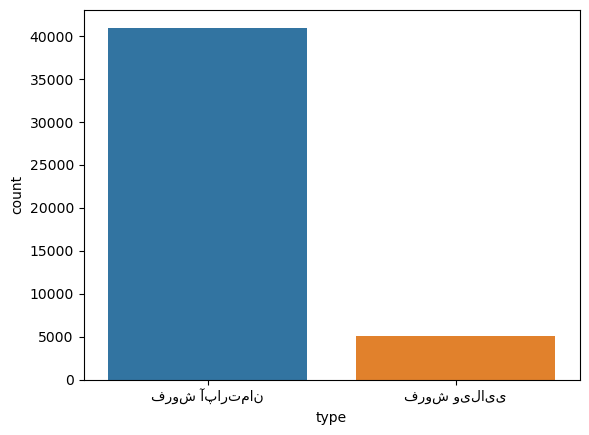

In [ ]:
sns.countplot(x=data['type'])

### Area

(array([4.576e+04, 2.040e+02, 5.300e+01, 9.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 4.000e+00, 6.000e+00]),
 array([   0.,  720., 1440., 2160., 2880., 3600., 4320., 5040., 5760.,
        6480., 7200.]),
 <BarContainer object of 10 artists>)

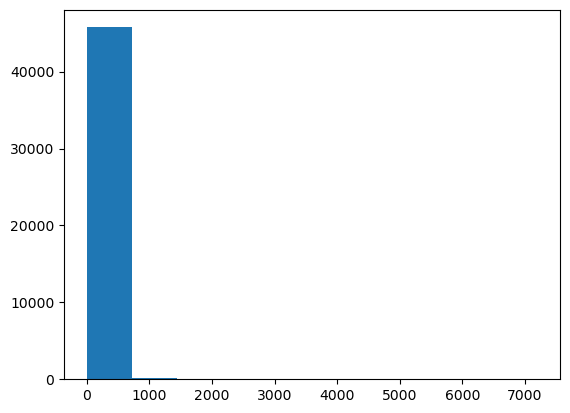

In [ ]:
plt.hist(data['area'])

In [ ]:
data.loc[data['area'] > 450].sum()

type             فروش ویلاییفروش ویلاییفروش ویلاییفروش آپارتمان...
area                                                      634176.0
neighborhood      الهیه چهارراه لشکر سجاد چهارراه لشکر 17 شهریو...
latitude                                              24150.839009
longitude                                             39595.460898
age                                                         7671.0
floor                                                       1235.0
bedrooms                                                    2596.0
price                                               42967726003832
sqmprice                                             48431419273.0
zone                                                        4162.0
street           امیریهامام رضاسجادامام رضاهفده شهریورصیاد شیرا...
elevator                                                       217
parking                                                        638
storage                                                       

These outlier should be removed

In [ ]:
data = data.drop(data[data['area'] > 450].index)

(array([  113., 12073., 16895., 10081.,  3044.,  1800.,   665.,   429.,
          183.,   102.]),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360., 405., 450.]),
 <BarContainer object of 10 artists>)

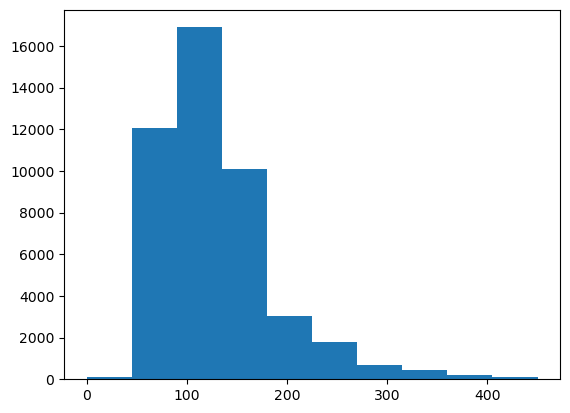

In [ ]:
plt.hist(data['area'])

In [ ]:
data.loc[data['area'] == 0]

,type,area,neighborhood,latitude,longitude,age,floor,bedrooms,price,sqmprice,zone,street,elevator,parking,storage,yard,balcony,reconstructed
14518,فروش آپارتمان,0.0,دانشجو,36.333390,59.495752,14.0,2.0,2.0,2790000000,inf,11.0,صدف,False,True,True,False,False,False
18651,فروش آپارتمان,0.0,آزاد شهر,36.327540,59.527520,18.0,2.0,3.0,7000000000,inf,11.0,آزادشهر,False,True,True,False,False,True
30918,فروش آپارتمان,0.0,الهیه,36.373776,59.475820,5.0,2.0,3.0,5616000000,inf,12.0,الهیه,True,True,True,False,False,True
33334,فروش آپارتمان,0.0,قاسم آباد,36.372743,59.504568,12.0,2.0,2.0,2700000000,inf,10.0,قاسم آباد,False,True,True,False,False,True
35074,فروش آپارتمان,0.0,قاسم آباد,36.360020,59.517400,9.0,3.0,2.0,2000000000,inf,10.0,قاسم آباد,False,False,False,False,False,False
42969,فروش آپارتمان,0.0,الهیه,36.373776,59.475820,10.0,6.0,2.0,2590000000,inf,12.0,الهیه,True,True,False,False,False,False
46485,فروش آپارتمان,0.0,قاسم آباد,36.349464,59.470745,10.0,0.0,2.0,1900000000,inf,10.0,قاسم آباد,False,False,False,False,False,False


In [ ]:
data = data.drop(data[data['area'] == 0].index)

### Zone

(array([ 4818.,  5074.,  1162.,  1392.,     0.,   231.,  1374.,  2300.,
         8930.,  4359.,  4786., 10952.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

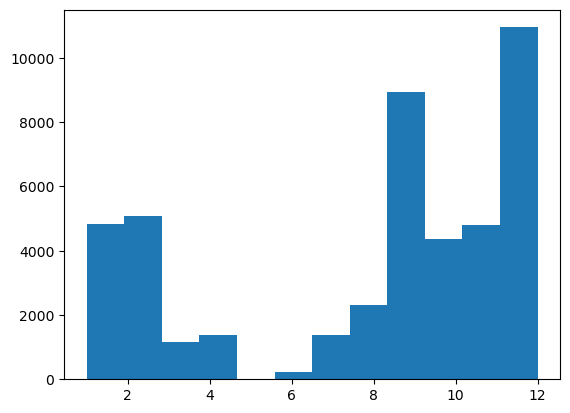

In [ ]:
plt.hist(data['zone'], bins=12)

### Longitude & Latitude

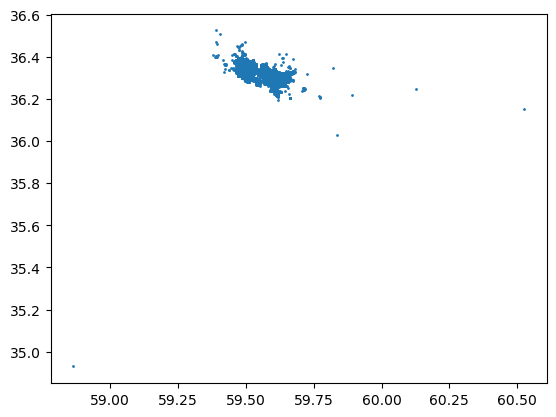

In [ ]:
plt.scatter(x=data['longitude'], y=data['latitude'], s=1)

Dropping the outlier items from right and bottom left

In [ ]:
data = data.drop(data[(data['longitude'] < 59.45) | (data['longitude'] > 59.70) | (data['latitude'] > 36.40) | (data['latitude'] < 36.20)].index)

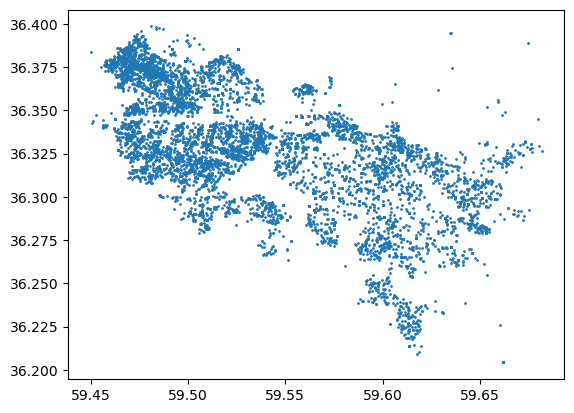

In [ ]:
plt.scatter(x=data['longitude'], y=data['latitude'], s=1)

Here, we can clearly see Mashhad's map

### Age

<Axes: xlabel='age', ylabel='count'>

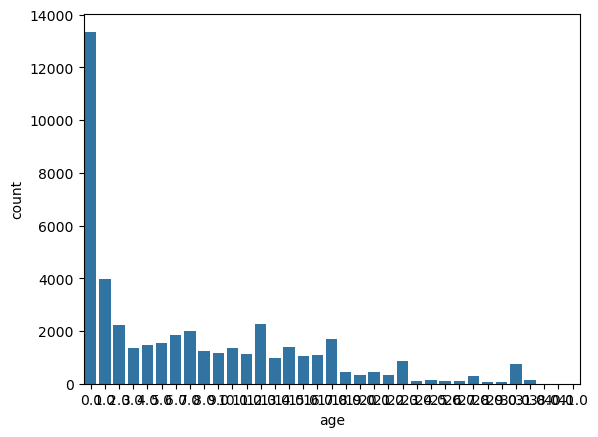

In [ ]:
sns.countplot(x=data['age'], color='#1f77b4')

### Floor

<Axes: xlabel='floor', ylabel='count'>

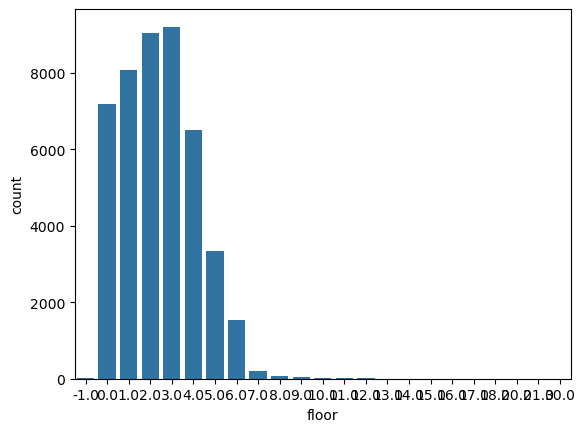

In [ ]:
sns.countplot(x=data['floor'], color='#1f77b4')

In [ ]:
data['floor'].value_counts()

 3.0     9202
 2.0     9037
 1.0     8071
 0.0     7170
 4.0     6502
 5.0     3350
 6.0     1534
 7.0      200
 8.0       67
 9.0       49
 10.0      28
-1.0       23
 11.0      18
 12.0       6
 14.0       5
 13.0       5
 18.0       3
 16.0       3
 20.0       2
 17.0       1
 15.0       1
 30.0       1
 21.0       1
Name: floor, dtype: int64

In [ ]:
data = data.drop(data[(data['floor'] > 10) | (data['floor'] < 0)].index)

<Axes: xlabel='floor', ylabel='count'>

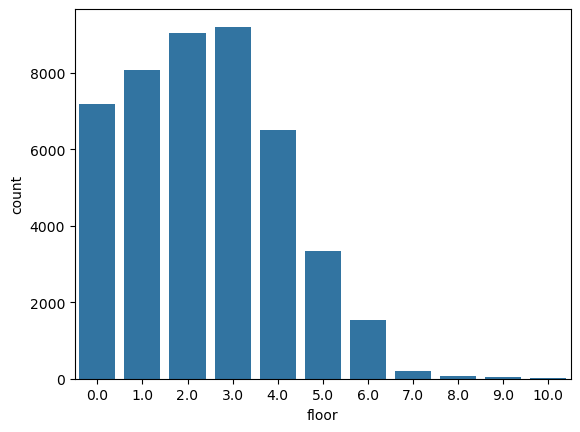

In [ ]:
sns.countplot(x=data['floor'], color='#1f77b4')

### Bedrooms

<Axes: xlabel='bedrooms', ylabel='count'>

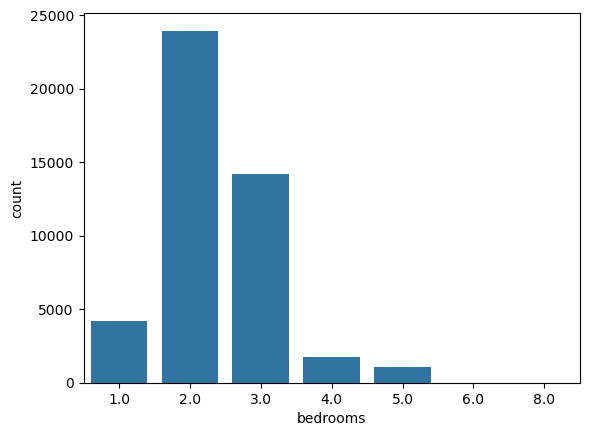

In [ ]:
sns.countplot(x=data['bedrooms'], color='#1f77b4')

In [ ]:
data = data.drop(data[data['bedrooms'] > 5].index)

<Axes: xlabel='bedrooms', ylabel='count'>

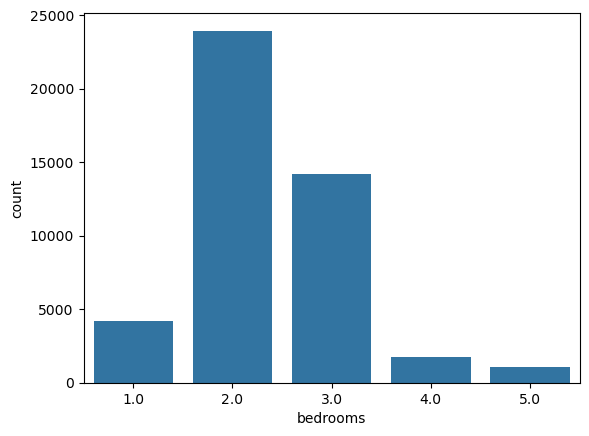

In [ ]:
sns.countplot(x=data['bedrooms'], color='#1f77b4')

### Price

(array([4.5192e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([6.0000000e+06, 4.3000540e+11, 8.6000480e+11, 1.2900042e+12,
        1.7200036e+12, 2.1500030e+12, 2.5800024e+12, 3.0100018e+12,
        3.4400012e+12, 3.8700006e+12, 4.3000000e+12]),
 <BarContainer object of 10 artists>)

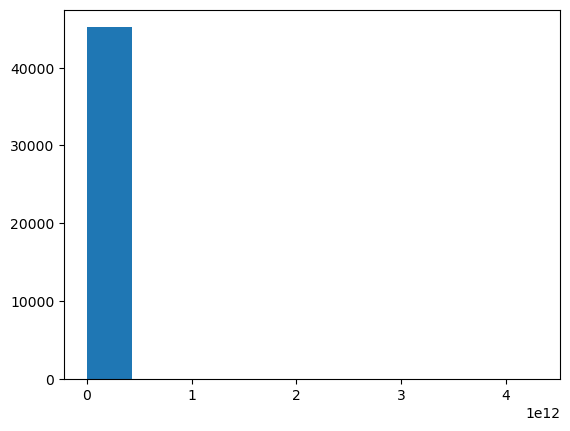

In [ ]:
plt.hist(data['price'])

In [ ]:
data['price'].describe()

count    4.519700e+04
mean     5.885442e+09
std      2.229627e+10
min      6.000000e+06
25%      2.640000e+09
50%      3.880000e+09
75%      6.500000e+09
max      4.300000e+12
Name: price, dtype: float64

In [ ]:
data = data.drop(data[data['price'] > 40000000000].index)

(array([23899., 13714.,  3934.,  1256.,   829.,   492.,   439.,   240.,
          134.,    83.]),
 array([6.00000e+06, 4.00540e+09, 8.00480e+09, 1.20042e+10, 1.60036e+10,
        2.00030e+10, 2.40024e+10, 2.80018e+10, 3.20012e+10, 3.60006e+10,
        4.00000e+10]),
 <BarContainer object of 10 artists>)

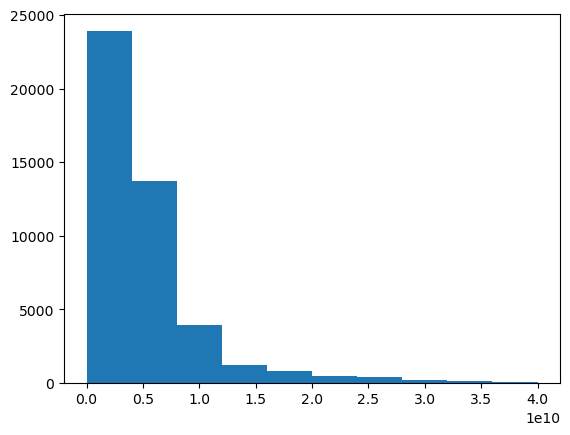

In [ ]:
plt.hist(data['price'])

### Price & Area

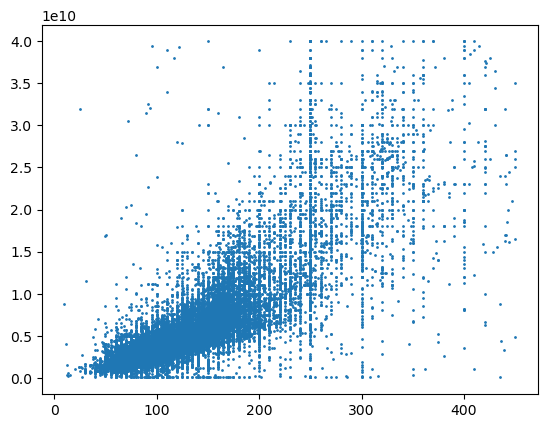

In [ ]:
plt.scatter(data['area'], data['price'], s=1)

### Elevator

<Axes: xlabel='elevator', ylabel='count'>

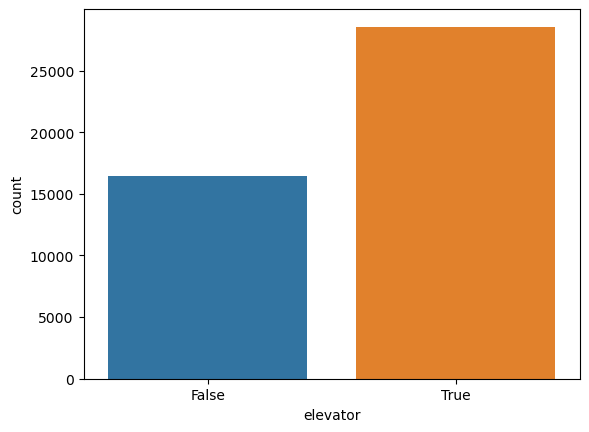

In [ ]:
sns.countplot(x=data['elevator'])

### Parking

<Axes: xlabel='parking', ylabel='count'>

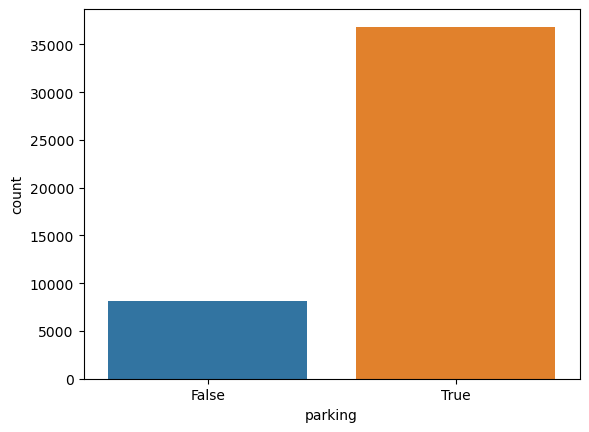

In [ ]:
sns.countplot(x=data['parking'])

### Storage

<Axes: xlabel='storage', ylabel='count'>

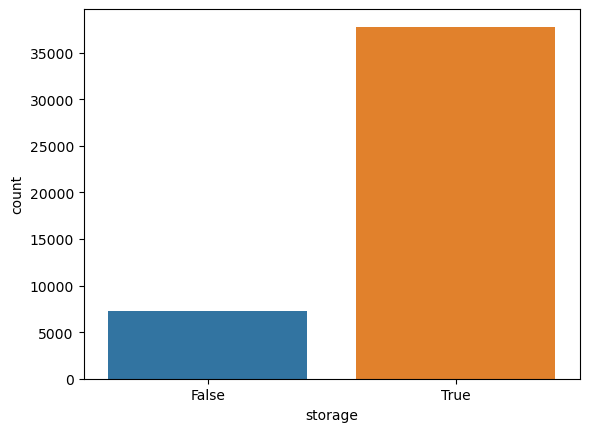

In [ ]:
sns.countplot(x=data['storage'])

### Yard

<Axes: xlabel='yard', ylabel='count'>

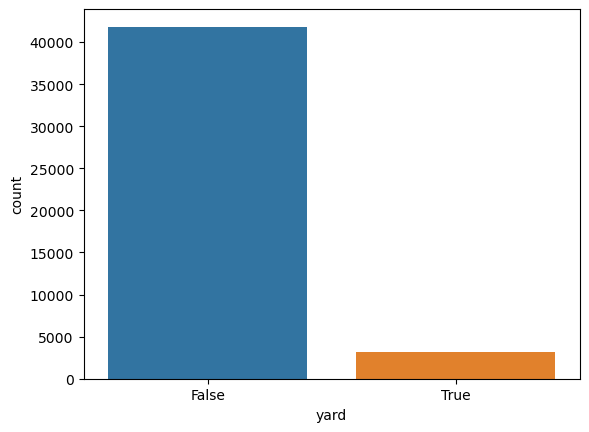

In [ ]:
sns.countplot(x=data['yard'])

### Balcony

<Axes: xlabel='balcony', ylabel='count'>

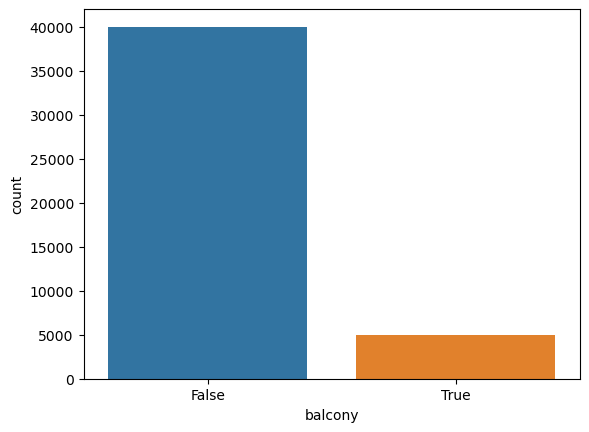

In [ ]:
sns.countplot(x=data['balcony'])

### Area & sqm price

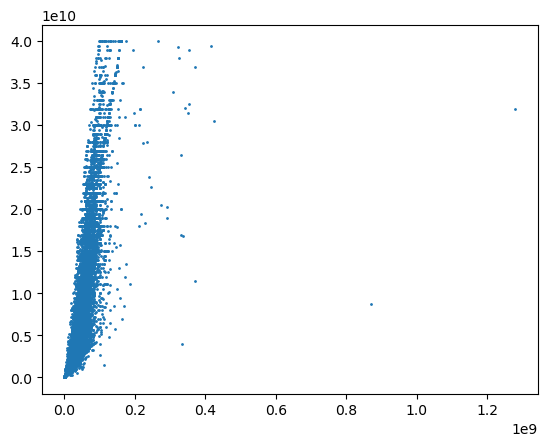

In [ ]:
plt.scatter(x=data['sqmprice'], y=data['price'], s=1)

In [ ]:
data.loc[data['sqmprice'] > 165000000].head()

,type,area,neighborhood,latitude,longitude,age,floor,bedrooms,price,sqmprice,zone,street,elevator,parking,storage,yard,balcony,reconstructed
649,فروش آپارتمان,92.0,آب و برق,36.332903,59.469986,14.0,4.0,2.0,32500000000,353260869.0,9.0,اقبال لاهوری,True,True,True,False,False,True
1723,فروش ویلایی,180.0,آزاد شهر,36.327540,59.527520,27.0,0.0,3.0,31000000000,172222222.0,11.0,آزادشهر,False,True,True,False,True,False
2902,فروش آپارتمان,90.0,قاسم آباد,36.360020,59.517400,6.0,8.0,2.0,31500000000,350000000.0,10.0,قاسم آباد,True,True,True,False,False,True
3368,فروش ویلایی,150.0,17 شهریور,36.276045,59.617282,30.0,0.0,5.0,30000000000,200000000.0,7.0,هفده شهریور,False,True,True,False,True,False
3868,فروش آپارتمان,50.0,الهیه,36.373776,59.475820,16.0,1.0,1.0,16800000000,336000000.0,12.0,الهیه,False,False,False,False,False,True


In [ ]:
data = data.drop(data[data['sqmprice'] > 165000000].index)

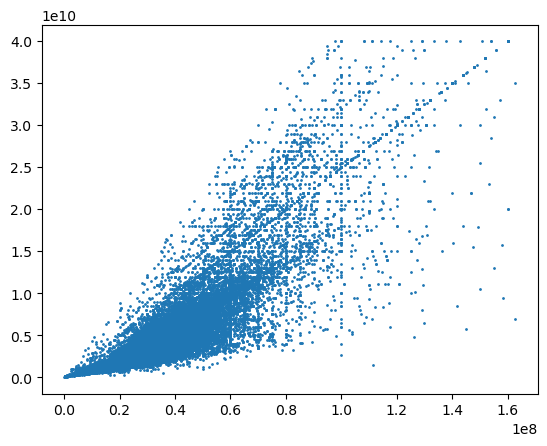

In [ ]:
plt.scatter(x=data['sqmprice'], y=data['price'], s=1)

### Bedrooms & Area

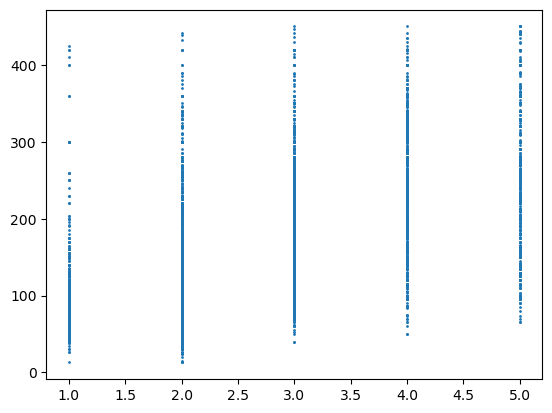

In [ ]:
plt.scatter(x=data['bedrooms'], y=data['area'], s = 1)

### Bedroom & Price

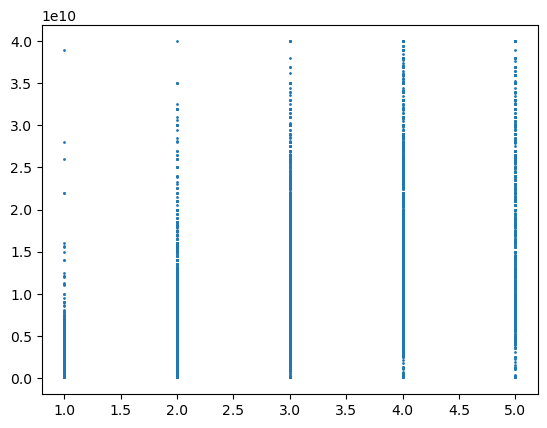

In [ ]:
plt.scatter(data['bedrooms'], data['price'], s=1)

### Reconstructed

<Axes: xlabel='reconstructed', ylabel='count'>

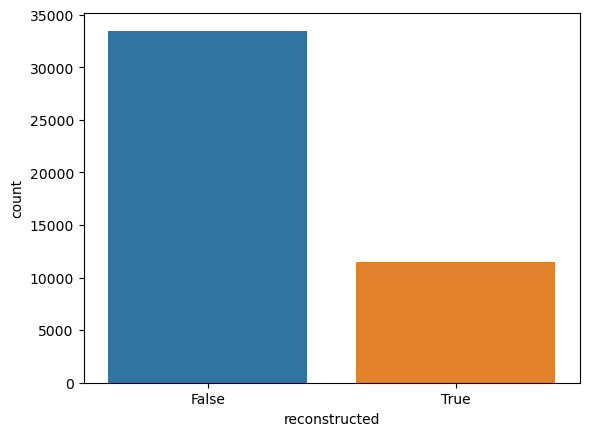

In [ ]:
sns.countplot(x=data['reconstructed'])

## MLP

In [ ]:
onehot_encoded.to_csv('onehot_final_data.csv', index=False)

label_encoded.to_csv('label_final_data.csv', index=False)

In [ ]:
data = pd.read_csv('onehot_final_data.csv')

### Eliminating Infs

In [ ]:
data.isin([np.inf, -np.inf]).sum().sum()

7

In [ ]:
data = data.replace([np.inf, -np.inf], np.finfo('float64').max)

In [ ]:
data.isin([np.inf, -np.inf]).sum()

area                   0
latitude               0
longitude              0
age                    0
floor                  0
                      ..
yard_True              0
balcony_False          0
balcony_True           0
reconstructed_False    0
reconstructed_True     0
Length: 317, dtype: int64

## Preparation

In [ ]:
data

,area,latitude,longitude,age,floor,bedrooms,price,sqmprice,zone,type_فروش آپارتمان,...,parking_False,parking_True,storage_False,storage_True,yard_False,yard_True,balcony_False,balcony_True,reconstructed_False,reconstructed_True
0,73.0,36.373776,59.475820,11.0,1.0,2.0,2200000000,30136986.0,12.0,1,...,0,1,0,1,1,0,1,0,1,0
1,100.0,36.327670,59.548380,7.0,1.0,2.0,4800000000,48000000.0,2.0,1,...,0,1,0,1,0,1,1,0,1,0
2,140.0,36.310605,59.504477,0.0,2.0,2.0,10200000000,72857142.0,9.0,1,...,0,1,0,1,1,0,1,0,1,0
3,65.0,36.400540,59.388382,6.0,4.0,1.0,870000000,13384615.0,12.0,1,...,1,0,1,0,1,0,1,0,1,0
4,200.0,36.373776,59.475820,0.0,0.0,3.0,5350000000,26750000.0,12.0,1,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,110.0,36.328550,59.513390,4.0,4.0,2.0,5100000000,46363636.0,11.0,1,...,0,1,0,1,1,0,1,0,1,0
46046,110.0,36.371452,59.484620,4.0,3.0,2.0,4100000000,37272727.0,12.0,1,...,0,1,0,1,1,0,1,0,1,0
46047,140.0,36.319780,59.494770,15.0,1.0,2.0,5500000000,39285714.0,9.0,1,...,0,1,0,1,1,0,1,0,0,1
46048,130.0,36.349873,59.488426,4.0,2.0,3.0,4100000000,31538461.0,10.0,1,...,0,1,0,1,1,0,1,0,0,1


In [ ]:
x = data.drop('price', axis=1)
y = data['price']
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [ ]:
x = x.replace([np.inf, -np.inf], np.finfo('float64').max)
y = y.replace([np.inf, -np.inf], np.finfo('float64').max)

In [ ]:
# train_index, test_index = next(sss.split(x, y))

This error would be caused

In [ ]:
'''
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[122], line 1
----> 1 train_index, test_index = next(sss.split(x, y))

File ~\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:1726, in BaseShuffleSplit.split(self, X, y, groups)
   1696 """Generate indices to split data into training and test set.
   1697 
   1698 Parameters
   (...)
   1723 to an integer.
   1724 """
   1725 X, y, groups = indexable(X, y, groups)
-> 1726 for train, test in self._iter_indices(X, y, groups):
   1727     yield train, test

File ~\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:2115, in StratifiedShuffleSplit._iter_indices(self, X, y, groups)
   2113 class_counts = np.bincount(y_indices)
   2114 if np.min(class_counts) < 2:
-> 2115     raise ValueError(
   2116         "The least populated class in y has only 1"
   2117         " member, which is too few. The minimum"
   2118         " number of groups for any class cannot"
   2119         " be less than 2."
   2120     )
...
   2124         "The train_size = %d should be greater or "
   2125         "equal to the number of classes = %d" % (n_train, n_classes)
   2126     )

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...'''

'\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\nCell In[122], line 1\n----> 1 train_index, test_index = next(sss.split(x, y))\n\nFile ~\\AppData\\Roaming\\Python\\Python311\\site-packages\\sklearn\\model_selection\\_split.py:1726, in BaseShuffleSplit.split(self, X, y, groups)\n   1696 """Generate indices to split data into training and test set.\n   1697 \n   1698 Parameters\n   (...)\n   1723 to an integer.\n   1724 """\n   1725 X, y, groups = indexable(X, y, groups)\n-> 1726 for train, test in self._iter_indices(X, y, groups):\n   1727     yield train, test\n\nFile ~\\AppData\\Roaming\\Python\\Python311\\site-packages\\sklearn\\model_selection\\_split.py:2115, in StratifiedShuffleSplit._iter_indices(self, X, y, groups)\n   2113 class_counts = np.bincount(y_indices)\n   2114 if np.min(class_counts) < 2:\n-> 2115     raise ValueError(\n   2116         "The least populated class 

###### This error took me a LONG time to figure out

Removing less than 1 populated classes

In [ ]:
values_list = y.value_counts()

In [ ]:
lesser_values = values_list.loc[values_list == 1].index
lesser_values

Int64Index([   685000000,   1444000000,    485000000,   5846000000,
              7672500000,    635000000,   2624000000,    219000000,
              1528000000,   4085000000,
            ...
              5025000000,   2555000000,   7899000000,  15180000000,
            103000000000,   4307000000,   6314000000,   7670000000,
             33600000000,  35700000000],
           dtype='int64', length=1349)

In [ ]:
# Doing the removal for x so both x and y lengths are equal
for num in lesser_values:
    x.drop(y[y == num].index, inplace=True, axis=0)  
    
for num in lesser_values:
    y.drop(y[y == num].index, inplace=True, axis=0)  

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 44701 entries, 0 to 46049
Series name: price
Non-Null Count  Dtype
--------------  -----
44701 non-null  int64
dtypes: int64(1)
memory usage: 698.5 KB


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44701 entries, 0 to 46049
Columns: 316 entries, area to reconstructed_True
dtypes: float64(8), int64(308)
memory usage: 108.1 MB


Both lengths are now equal 

In [ ]:
train_index, test_index = next(sss.split(x, y))

In [ ]:

X_train = data.iloc[test_index].drop('price', axis=1)
Y_train = data.iloc[test_index].price
X_test = data.iloc[test_index].drop('price', axis=1)
Y_test = data.iloc[test_index].price

### Scaling

In [ ]:
cols = X_train.columns
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test  = pd.DataFrame(X_test, columns=[cols])
X_train = pd.DataFrame(X_train, columns=[cols])

### Correlations

In [ ]:
feature_name = x.columns.values

In [ ]:
model = ensemble.ExtraTreesRegressor(n_estimators=30, max_depth=30, max_features=.5, n_jobs=-1, random_state=0)
model.fit(X_train, Y_train.to_numpy())

ExtraTreesRegressor(max_depth=30, max_features=0.5, n_estimators=30, n_jobs=-1,
                    random_state=0)

In [ ]:
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importance)[::-1][:20]

(-1.0, 20.0)

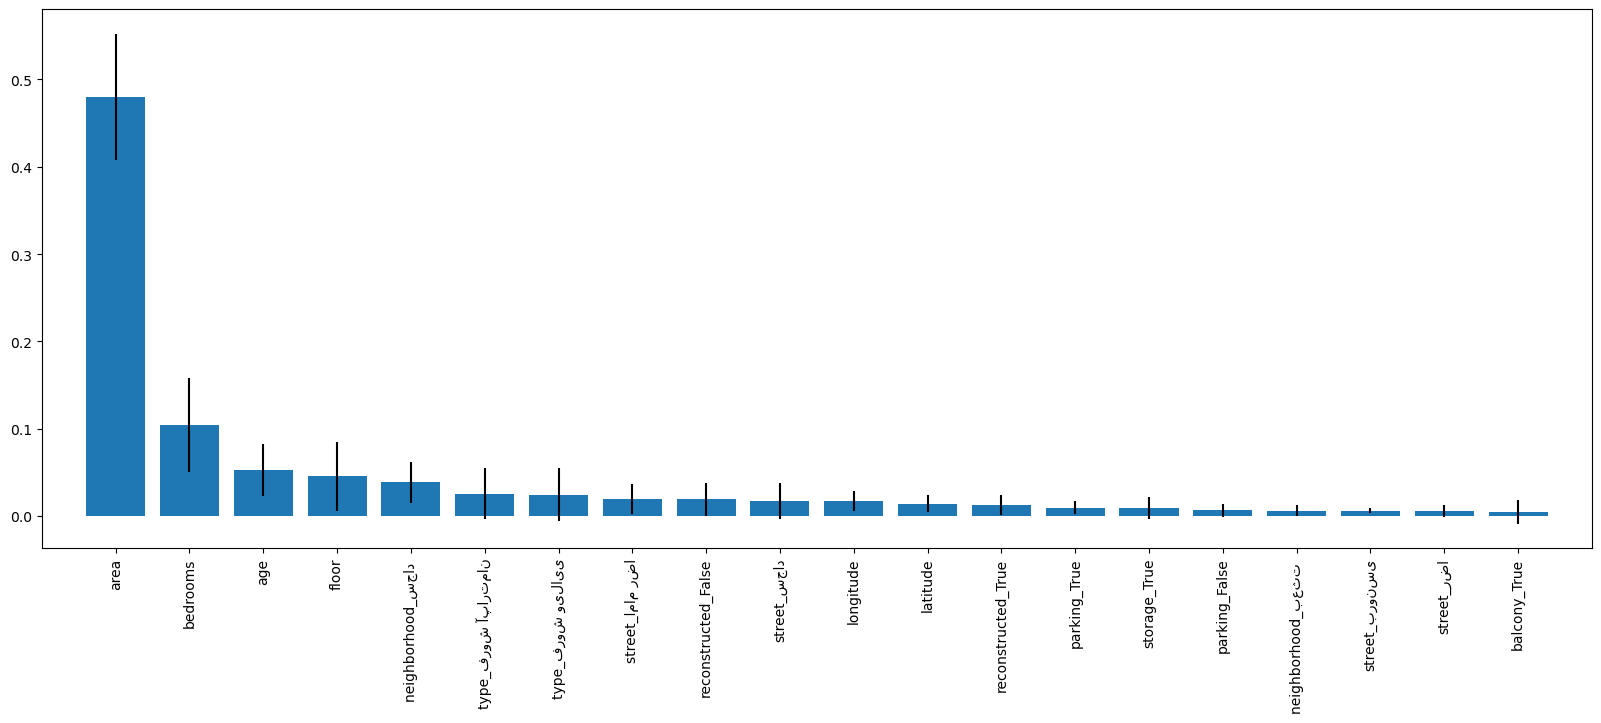

In [ ]:
plt.figure(figsize=(20, 7))
plt.bar(range(len(indices)), importance[indices], yerr=std[indices], align='center')
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])

### Feature selection

In [ ]:
chi2_features = SelectKBest(chi2, k=200)

dfscaled = X_train.copy()

X_kbest_features = chi2_features.fit_transform(dfscaled, Y_train)
chidata = pd.DataFrame(X_kbest_features)

chifeatures50 = []

for i in chidata.columns:
    for j in dfscaled.columns:
        if (chidata[i] == dfscaled[j]).sum() == len(chidata):
            print(j)
            chifeatures50.append(j)

('area',)
('age',)
('bedrooms',)
('sqmprice',)
('zone',)
('type_فروش آپارتمان',)
('type_فروش ویلایی',)
('neighborhood_ آزاد شهر ',)
('neighborhood_ الهیه ',)
('neighborhood_ دانشجو ',)
('neighborhood_ قاسم آباد ',)
('neighborhood_17 شهریور ',)
('neighborhood_آب و برق  ',)
('neighborhood_آبکوه ',)
('neighborhood_احمد آباد ',)
('neighborhood_بعثت ',)
('neighborhood_حله طلاب ',)
('neighborhood_رضاشهر ',)
('neighborhood_سجاد ',)
('neighborhood_سیدی ',)
('neighborhood_شهدا ',)
('neighborhood_فرامرز عباسی ',)
('neighborhood_مصلی ',)
('neighborhood_هدایت ',)
('neighborhood_هنرستان ',)
('neighborhood_چهارراه لشکر ',)
('neighborhood_کوهسنگی ',)
('neighborhood_کوی امیرالمومنین ',)
('neighborhood_گاز ',)
('street_ آیت الله بهجت',)
('street_ کاشانی',)
('street_آبکوه',)
('street_آخوند خراسانی',)
('street_آزادشهر',)
('street_آزاده',)
('street_آموزگار فرد تا 37 و زوج تا 40',)
('street_آموزگار(فرد از 39 زوج از42)',)
('street_آیت الله دستغیب',)
('street_ابرار',)
('street_ابوذر غفاری',)
('street_ابوطالب

In [ ]:
indices = np.argsort(importance)[::-1][:50]
fimport = list(feature_name[indices])
fimport

['area',
 'bedrooms',
 'age',
 'floor',
 'neighborhood_سجاد ',
 'type_فروش آپارتمان',
 'type_فروش ویلایی',
 'street_امام رضا',
 'reconstructed_False',
 'street_سجاد',
 'longitude',
 'latitude',
 'reconstructed_True',
 'parking_True',
 'storage_True',
 'parking_False',
 'neighborhood_بعثت ',
 'street_برونسی',
 'street_رضا',
 'balcony_True',
 'neighborhood_ آزاد شهر ',
 'yard_True',
 'neighborhood_چهارراه لشکر ',
 'zone',
 'storage_False',
 'neighborhood_آب و برق  ',
 'street_احمدآباد',
 'elevator_True',
 'street_آزادشهر',
 'balcony_False',
 'elevator_False',
 'neighborhood_هنرستان ',
 'street_ملک اباد',
 'yard_False',
 'neighborhood_ الهیه ',
 'street_سناباد',
 'street_الهیه',
 'street_گاز',
 'neighborhood_ قاسم آباد ',
 'street_هاشمیه',
 'street_راهنمایی',
 'neighborhood_حله طلاب ',
 'street_هنرستان',
 'street_باهنر',
 'street_کوهسنگی',
 'neighborhood_گاز ',
 'street_قاسم آباد',
 'street_دانشجو',
 'street_مفتح',
 'street_کوثر جنوبی']

## Training the Model

### Model Evaluation Methods

In [ ]:
def evaluate(prediction, real):
    accuracy = accuracy_score(prediction, real)
    balanced_accuracy = balanced_accuracy_score(prediction, real)
    f1 = f1_score(prediction, real, average='macro')
    
    print(f"Accuracy: {accuracy_score} \nBalanced Accuracy: {balanced_accuracy} \nMacro Average F1: {f1}")

In [ ]:
def classprecision(y_test, y_pred):
    for i in y_test.unique():
        realclassi = y_test == i
        preclassi  = y_pred == i
        precision = precision_score(realclassi, preclassi)
        recall = recall_score(realclassi, preclassi)
        
        print(f"Class: {i}  Precision: {precision}")

### Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=40, splitter='best', criterion='entropy', min_samples_leaf=1, max_features='sqrt')

clf = clf.fit(X_train, Y_train)

In [ ]:
Y_pred = clf.predict(X_test)

# evaluate(Y_test, Y_pred)
#classprecision(Y_test, Y_pred)

Accuracy is 0.2368073594848  

Didn't print class precision because it was too long 

---

#### Hyper parameters

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=1)

In [ ]:
parameters = {
    'max_depth': [10, 20, 30, 40, 50, 100, 150, 200, 300],
    'splitter' : ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=2, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
%%time
grid_search.fit(X_train, Y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

### Gaussian Naive Bays

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train[fimport], Y_train)
Y_pred = gnb.predict(X_test[fimport])

In [ ]:
evaluate(Y_test, Y_pred)

### MLP

In [ ]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 600),
                    random_state=0, verbose=True, learning_rate='adaptive', max_iter=1000)

In [ ]:
mlp.fit(X_train[fimport], Y_train)

In [ ]:
Y_pred = mlp.predict(X_test[fimport])
evaluate(Y_test, Y_pred)

---

#### Hyper parameters

In [ ]:
mlp = MLPClassifier()

In [ ]:
parameters = {
    'hidden_layer_sizes': [(50, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [1e-5],
    'learning_rate': ['adaptive'],
    'random_state': [1]
}

In [ ]:
grid_search1 = GridSearchCV(estimator=mlp, param_grid=parameters, cv=2, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
%%time
grid_search1.fit(X_train[fimport], Y_train)

In [ ]:
score_df = pd.DataFrame(grid_search1.cv_results_)
score_df.nlargest(5,"mean_test_score")

---

In [ ]:
Y_train.to

# Getting the output